# Titanic Dataset Example 🚢

This example demonstrates how to fetch the Titanic dataset using **Scikit-learn** and explore it. We will use the dataset from OpenML.

[OpenML](https://openml.org) is an open, collaborative platform for machine learning. It provides access to datasets, algorithms, and experiments, making it easy to share and reuse data and models. By promoting transparency and reproducibility, OpenML accelerates discovery and supports open science in the field of machine learning.

In [128]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Fetch the Titanic dataset
titanic = fetch_openml("titanic", version=1, as_frame=True)

# Print details about the dataset
pprint(titanic.details)

{'default_target_attribute': 'survived',
 'description_version': '9',
 'file_id': '16826755',
 'format': 'ARFF',
 'id': '40945',
 'licence': 'Public',
 'md5_checksum': '60ac7205eee0ba5045c90b3bba95b1c4',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0004/40945/dataset_40945.pq',
 'name': 'Titanic',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0004/40945/dataset_40945.pq',
 'processing_date': '2018-10-04 07:19:36',
 'status': 'active',
 'tag': ['Computational Universe', 'Manufacturing', 'text_data'],
 'upload_date': '2017-10-16T01:17:36',
 'url': 'https://api.openml.org/data/v1/download/16826755/Titanic.arff',
 'version': '1',
 'visibility': 'public'}


In [129]:
# Initialize the dataframe
df = titanic.frame

# Print the first 5 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


In [130]:
# Subset the dataframe
subset = df.copy()
subset = subset.drop(columns=['cabin', 'boat', 'body', 'home.dest', 'name', 'ticket'])

# Remove rows with missing values
df_clean = subset.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1043 non-null   int64   
 1   survived  1043 non-null   category
 2   sex       1043 non-null   category
 3   age       1043 non-null   float64 
 4   sibsp     1043 non-null   int64   
 5   parch     1043 non-null   int64   
 6   fare      1043 non-null   float64 
 7   embarked  1043 non-null   category
dtypes: category(3), float64(2), int64(3)
memory usage: 52.3 KB


In [131]:
# Define the feature matrix X and the target vector y
X = df_clean.drop(columns='survived')
y = df_clean['survived']

# Separate numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64'])
categorical_features = X.select_dtypes(include=['category'])

# Perform one-hot encoding on categorical features
categorical_features_onehot = pd.get_dummies(categorical_features)

# Concatenate numeric and one-hot encoded categorical features
X_onehot = pd.concat([numeric_features, categorical_features_onehot], axis=1)

# Print information about the one-hot encoded feature matrix
X_onehot.info()
print("Dimensions of the one-hot encoded feature matrix: ", X_onehot.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1043 non-null   int64  
 1   age         1043 non-null   float64
 2   sibsp       1043 non-null   int64  
 3   parch       1043 non-null   int64  
 4   fare        1043 non-null   float64
 5   sex_female  1043 non-null   bool   
 6   sex_male    1043 non-null   bool   
 7   embarked_C  1043 non-null   bool   
 8   embarked_Q  1043 non-null   bool   
 9   embarked_S  1043 non-null   bool   
dtypes: bool(5), float64(2), int64(3)
memory usage: 54.0 KB
Dimensions of the one-hot encoded feature matrix:  (1043, 10)


In [132]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_onehot,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Print the dimensions of the training and test sets
print("Dimensions of the training and test sets:")
print(X_train.shape)
print(X_test.shape)

Dimensions of the training and test sets:
(834, 10)
(209, 10)


In [133]:
# Initialize the model
model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate precision, recall, and F1-score for training set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, pos_label='1')
recall_train = recall_score(y_train, y_pred_train, pos_label='1')
f1_train = f1_score(y_train, y_pred_train, pos_label='1')

# Calculate precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, pos_label='1')
recall_test = recall_score(y_test, y_pred_test, pos_label='1')
f1_test = f1_score(y_test, y_pred_test, pos_label='1')

# Store the metrics in a DataFrame with rounded values
metrics_df = pd.DataFrame({
    'Set': ['Train', 'Test'],
    'Accuracy': [round(accuracy_train, 2), round(accuracy_test, 2)],
    'Precision': [round(precision_train, 2), round(precision_test, 2)],
    'Recall': [round(recall_train, 2), round(recall_test, 2)],
    'F1-Score': [round(f1_train, 2), round(f1_test, 2)]
})

# Save this to a CSV file
metrics_df.to_csv('metrics.csv', index=False)

metrics_df

,Set,Accuracy,Precision,Recall,F1-Score
0,Train,0.80,0.79,0.69,0.74
1,Test,0.76,0.75,0.62,0.68


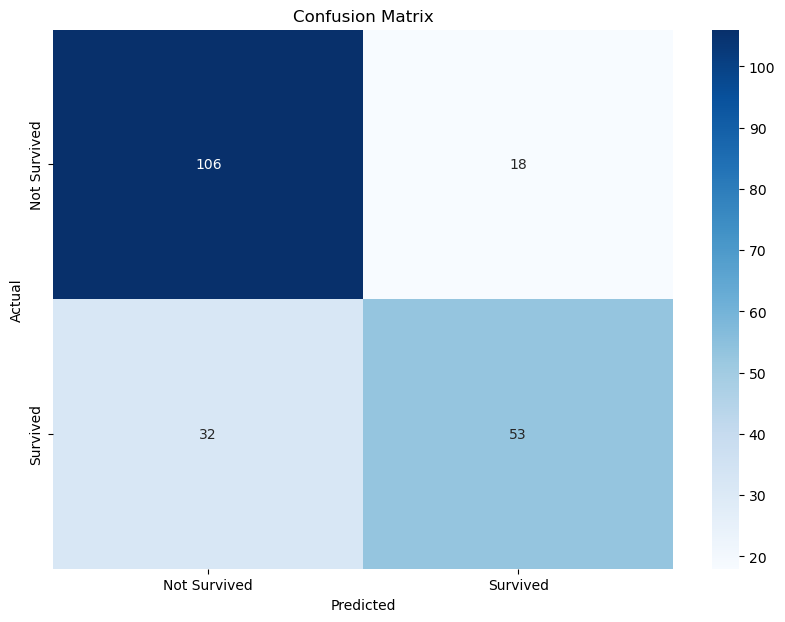

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Save the plot
plt.savefig('confusion_matrix.png')

# Display the plot
plt.show()